In [1]:
import scipy.stats as stats
from scipy.integrate import quad
import scipy
import numpy as np
import pandas as pd
import time
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit

In [2]:
#load the parameters, and their short int feats?
parameters = pd.read_csv("../../Figures/MCMCFigures/Weibull_Parameters_266.csv", index_col =0 )
#parameters.head(5)
parameters[parameters["Gamma"]<1]

,ID,Gamma,Location,Alpha
40,13362.0,0.058621,1.874032,4.227547e-01
45,1364.0,0.278282,4.686833,8.645099e-02
53,1424.0,0.356004,4.091710,1.255441e+00
56,1449.0,0.856103,4.347785,9.457170e-01
62,1508.0,0.748105,4.173922,2.625615e-03
68,1601.0,0.890051,4.416612,3.363478e-02
104,1829.0,0.913575,5.110561,4.502986e-02
110,1848.0,0.650236,2.931098,5.483047e-01
118,1880.0,0.708941,4.461278,1.917586e-01
119,1886.0,0.356468,4.668548,1.209570e+00


In [3]:
short_feats = pd.read_csv("../../csvs/BetaFeats/sifOrbsMore=10000.0Nout=100window=10.csv", index_col =0 )
short_feats.head()

,runstring,t_final_short,Rel_Eerr_short,avg_beta12,std_beta12,min_beta12,max_beta12,avg_beta23,std_beta23,min_beta23,...,min_iH3,avg_ecross3,std_ecross3,max_ecross3,min_ecross3,norm_a3_slope,wall_time,Stable,instability_time,Rel_Eerr
0,0000000.bin,10000.0,1.346025e-08,8.488064,0.048209,8.344623,8.551727,15.791595,0.085995,15.576612,...,4.410404,0.297364,0.016641,0.339655,0.010871,2.681898e-11,0.395531,0.0,1.235644e+07,1.099985e-04
1,0000001.bin,10000.0,8.934681e-10,8.414875,0.039142,8.308582,8.495900,15.314101,0.037065,15.254833,...,0.588028,0.115674,0.039718,0.251880,0.137917,-9.314702e-11,0.403877,0.0,1.348749e+05,1.388587e-08
2,0000002.bin,10000.0,3.169983e-08,3.566625,0.132349,3.331239,3.773868,25.113282,0.137779,24.898424,...,0.875622,0.038930,0.002380,0.026117,0.007227,-4.095504e-11,0.397334,0.0,1.276381e+04,3.048261e-04
3,0000003.bin,10000.0,6.097589e-10,18.513867,0.003597,18.498104,18.521611,19.142029,0.008997,19.120348,...,9.650551,0.514386,0.003658,0.301072,0.279903,-7.257099e-12,0.391764,1.0,1.000000e+09,6.492574e-10
4,0000004.bin,10000.0,5.951220e-03,23.314674,6.756316,3.957209,38.942908,-19.036068,5.544896,-21.930247,...,0.154157,0.496372,0.248052,1.358604,0.261358,-2.610208e-08,0.402905,0.0,8.791888e+01,9.336734e-07


In [4]:
subsystem = parameters["ID"].values.astype(int)
#print subsystem
sub_short = short_feats.loc[subsystem]
sub_short.head()

,runstring,t_final_short,Rel_Eerr_short,avg_beta12,std_beta12,min_beta12,max_beta12,avg_beta23,std_beta23,min_beta23,...,min_iH3,avg_ecross3,std_ecross3,max_ecross3,min_ecross3,norm_a3_slope,wall_time,Stable,instability_time,Rel_Eerr
1007,0001007.bin,10000.0,5.206029e-08,26.732355,0.043882,26.638832,26.835809,22.424908,0.341923,21.606912,...,0.499930,0.039808,0.016937,0.857421,0.714777,-1.082651e-08,0.388264,0.0,1.740364e+05,1.526402e-06
1021,0001021.bin,10000.0,4.398308e-09,8.336482,0.024231,8.275415,8.384433,12.815548,0.038202,12.731072,...,1.145887,0.367925,0.174110,0.029881,0.001526,-3.842643e-12,0.383372,0.0,2.689650e+06,1.961156e-07
1025,0001025.bin,10000.0,7.781939e-09,7.685149,0.040514,7.621851,7.766875,20.608268,0.027135,20.550142,...,0.214459,0.010761,0.000136,0.375722,0.365670,2.354612e-12,0.382403,0.0,6.744500e+05,9.745464e-10
1041,0001041.bin,10000.0,1.961802e-09,23.388121,0.004581,23.377418,23.395434,7.072915,0.105877,6.906414,...,9.175108,1.434662,0.050702,0.712976,0.578283,2.174409e-12,0.393527,0.0,7.144115e+05,1.061513e-07
10518,0010518.bin,10000.0,8.140560e-09,17.738335,0.016146,17.683682,17.771795,21.168231,0.009907,21.148539,...,3.865721,0.184720,0.000841,0.379382,0.373758,1.147297e-12,0.314230,0.0,9.271272e+06,4.160501e-07


In [5]:
#need to do a double integral

def weib(loc, loc_fixed, gamma, alpha, x):
    #assume x is log t
    prob = (gamma/alpha)* ((loc-loc_fixed)/alpha)**(gamma-1.) * np.exp(-((loc-loc_fixed)/alpha)**gamma)
    dist = (gamma/alpha)* ((x-loc)/alpha)**(gamma-1.) * np.exp(-((x-loc)/alpha)**gamma)
    return prob*dist

In [6]:
#need to do a double integral
#x must be an ARRAY
def weib_pdf(x, loc,  gamma, alpha):
    #assume x is log t
    problematic = np.where(x<loc)[0]
    #print problematic
    fine = np.where(x>loc)[0]
    #print fine
    prob = np.zeros_like(x)
    #print x[fine]
    
    prob[fine] = (gamma/alpha)* ((x[fine]-loc)/alpha)**(gamma-1.) * np.exp(-((x[fine]-loc)/alpha)**gamma)
    #print prob[fine]
    prob[problematic]=0.
    return prob

In [7]:
#need to do a double integral
#x can be int or aray, but has poor error handling
def weib_pdf_val(x, loc,  gamma, alpha):
    #assume x is log t  
    prob = (gamma/alpha)* ((x-loc)/alpha)**(gamma-1.) * np.exp(-((x-loc)/alpha)**gamma)
    #print prob[fine]
    return prob

In [8]:
#2.61402658322 1.28337089098 4.44752697372
gamma = 2.61402658322
alpha = 1.28337089098
loc = 4.44752697372
x = 4.5
(gamma/alpha)* ((x-loc)/alpha)**(gamma-1.) * np.exp(-((x-loc)/alpha)**gamma)

0.011692716127467438

In [9]:
from scipy.integrate import romberg
#for selected time t in the original dataset, what is the colvolved function?

for i in range(int(parameters.shape[0])):
    gamma = parameters["Gamma"][i]
    alpha = parameters["Alpha"][i]
    loc = parameters["Location"][i]
    x = np.log10(sub_short["instability_time"].values[i])
    
    
    #bins = np.linspace(loc , loc+2*alpha, 100)
    #plt.axvline(loc+ alpha*scipy.special.gamma(1+1./gamma))
    #y = weib(loc, gamma, alpha, bins)
    #plt.scatter(bins, y)
    val = romberg(weib, loc, loc+1, args=(loc, gamma, alpha, x))
    print gamma, alpha, loc, x ,val
    
    #this is the prob 
    #weib = (alpha/gamma)* ((x-loc)/alpha)**(gamma-1.) * np.exp(-((x-loc)/gamma)**gamma)
    #print weib
    
    break

2.61402658322 1.28337089098 4.44752697372 5.24064000641 nan


/home/naireen/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in double_scalars
/home/naireen/anaconda2/lib/python2.7/site-packages/scipy/integrate/quadrature.py:709: AccuracyWarning: divmax (10) exceeded. Latest difference = nan
  AccuracyWarning)


In [10]:
# Define model function to be used to fit to the data above:
def gauss(x, *p):
    A, mu, sigma = p
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))

2.58517470506 1.08332995498 5.20059513823 6.28428273508


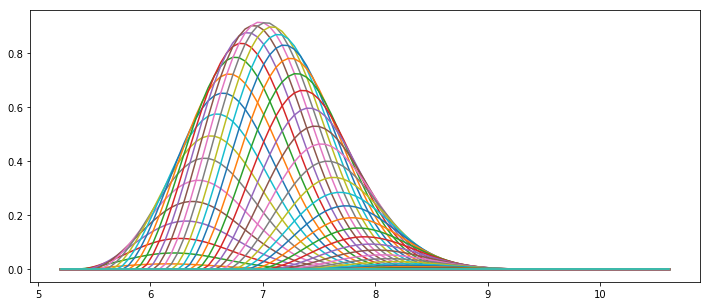

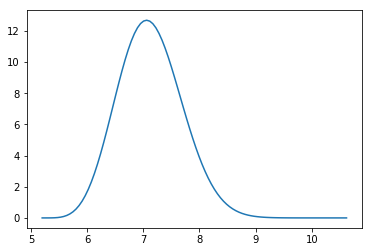

In [11]:
index_val = 142
gamma = parameters["Gamma"][index_val]
alpha = parameters["Alpha"][index_val]
loc = parameters["Location"][index_val]
x = np.log10(sub_short["instability_time"].values[index_val])
print gamma, alpha, loc, x 
from scipy.stats import norm
plt.figure(figsize=(12,5))
vals= np.linspace(loc+0.001, loc+alpha*5, 100)
final_y  = np.zeros(100)
for i in range(int(vals.shape[0])):
    
    #try manually adding three different functions
    bins = np.linspace(loc , loc+5*alpha, 100)
    val1 = vals[i]

    #print val1, loc, gamma, alpha
    prob = weib_pdf_val(val1, loc, gamma, alpha)
    #print prob
    y = prob*weib_pdf(bins, val1,gamma, alpha)
    #print y
    plt.plot(bins, y)
    final_y = np.nansum(np.asarray([y, final_y]), axis = 0)  #np.nansum(a=[y, final_y], axis= 1)
    #print y[:10]
    #print final_y[:10]
    #break
    
    
    
plt.figure()
final_y 
#print final_y
plt.plot(bins, final_y)





[ 12.76191094   7.09165335   0.57391411]


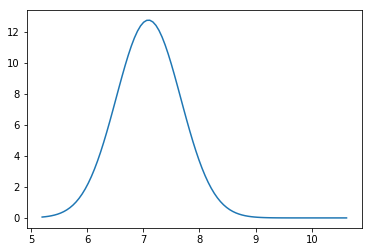

In [12]:
p0 = [1., loc+alpha*4, alpha] #norm, mean, sigma
#popt,pcov = curve_fit(gaus,x,y,p0=[1,mean,sigma])
coeff, var_matrix = scipy.optimize.curve_fit(gauss, bins, final_y, p0=p0)
# Get the fitted curve
print coeff
hist_fit = gauss(bins, *coeff)
plt.plot(bins, hist_fit)

Try doing this for all 145 systems

In [13]:
import time

In [14]:
start = time.time()
info = np.zeros((parameters.shape[0], 5))
corrupted = []
for index_val in range(int(parameters.shape[0])):
    fig = plt.figure(figsize=(15, 5))
    ax = fig.add_subplot("121")
    ax2 = fig.add_subplot("122")
    print index_val, 
    gamma = parameters["Gamma"][index_val]
    alpha = parameters["Alpha"][index_val]
    loc = parameters["Location"][index_val]
    x = np.log10(sub_short["instability_time"].values[index_val])
    #print "Spread", alpha
    #print gamma, alpha, loc, x 
    vals= np.linspace(loc+0.001, loc+alpha*5, 500)
    final_y  = np.zeros(100)
    for i in range(int(vals.shape[0])):
        bins = np.linspace(loc , loc+5*alpha, 100)
        val1 = vals[i]
        #get the entire pdf
        prob = weib_pdf_val(val1, loc, gamma, alpha)
        #get the probability that time being drawn
        y = prob*weib_pdf(bins, val1,gamma, alpha)
        ax.plot(bins, y)#just to prevent any errors
        final_y = np.nansum(np.asarray([y, final_y]), axis = 0)  #np.nansum(a=[y, final_y], axis= 1)
    #plt.figure(figsize=(12, 8))
    ax2.plot(bins, final_y)    
    p0 = [1., loc+alpha*3, alpha] #norm, mean, sigma
    #popt,pcov = curve_fit(gaus,x,y,p0=[1,mean,sigma])
    try:
        coeff, var_matrix = scipy.optimize.curve_fit(gauss, bins, final_y, p0=p0)
        #print var_matrix
        perr = np.sqrt(np.diag(var_matrix))
        info[index_val] = [sub_short.index[index_val], coeff[1], perr[1], coeff[2], perr[2]]
        plt_title = 'Convolution Parameters For System {4}: Mean: {0:.5} E {2:.4}   Sigma: {1:.5} E: {3:.4}'.format(coeff[1], np.abs(coeff[2]), perr[1], perr[2], sub_short.index[index_val])
        #print "Coefs: Mean, Sigma", coeff[1:], "Error", perr[1:]
    except Exception as e:
        print e
        corrupted.append(sub_short.index[index_val] )
        info[index_val] = [sub_short.index[index_val], np.inf, np.inf, np.inf, np.inf]
        plt_title = 'Convolution Parameters For System {0}'.format(sub_short.index[index_val])

    plt.suptitle(plt_title)
    plt.savefig("../../Figures/ConvolutedFigures/{0}.png".format(sub_short.index[index_val]))
    plt.close()
    #print sub_short.index[index_val]
    #break
    #hist_fit = gauss(bins, *coeff)
    #plt.plot(bins, hist_fit)

end = time.time()
print end-start


0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 Optimal parameters not found: Number of calls to function has reached maxfev = 800.
41 42 43 44 45 Optimal parameters not found: Number of calls to function has reached maxfev = 800.
46 47 48 49 50 51 52 53 Optimal parameters not found: Number of calls to function has reached maxfev = 800.
54 55 56 57 58 59 60 61 62 Optimal parameters not found: Number of calls to function has reached maxfev = 800.
63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 Optimal parameters not found: Number of calls to function has reached maxfev = 800.
120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 Optimal parameters not found: Number of calls to function has reached maxfev = 800.
150 15

/home/naireen/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: overflow encountered in power
/home/naireen/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in multiply
/home/naireen/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: overflow encountered in double_scalars
/home/naireen/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in double_scalars


 261 262 Optimal parameters not found: Number of calls to function has reached maxfev = 800.
263 264 265

/home/naireen/anaconda2/lib/python2.7/site-packages/scipy/optimize/minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


 365.938508034


The ones that failed were the exp dists with very low values of gamma, because even after convoluting them, they remain an exponential (as expected)

In [15]:
print corrupted
np.savetxt("../../../Corrupted.txt", corrupted )

[13362, 1364, 1424, 1508, 1886, 2059, 2105, 22032, 24013, 4641, 7341, 8582]


In [16]:
info_frame = pd.DataFrame(info, columns=["ID", "Mean" , "Mean_Error", "Sigma", "Error"])
print info_frame.shape
#info_frame.to_csv("../../Figures/ConvolutedFigures/Convolved_Params_266.csv")
info_frame.head()

(266, 5)


,ID,Mean,Mean_Error,Sigma,Error
0,1007.0,6.690395,0.003361,0.673699,0.003362
1,1021.0,7.008166,0.000794,0.491397,0.000794
2,1025.0,6.578721,0.004413,0.557288,0.004418
3,1041.0,6.496167,0.008348,0.674804,0.008426
4,10518.0,7.033292,0.009821,0.599368,0.010098


In [12]:
#reload csv
info_frame = pd.read_csv("../../Figures/ConvolutedFigures/Convolved_Params_266.csv")
#system 787 is weird, high sigma value
valid_info_frame= info_frame[(info_frame["Mean"]!=np.inf) & (info_frame["Sigma"]<10)] #need to see what causes this
print valid_info_frame["Sigma"].max()
print valid_info_frame.shape[0], "out of", info_frame.shape[0]
#info_frame.hist("Sigma")
ind =  np.where(valid_info_frame["Sigma"] == valid_info_frame["Sigma"].max())[0][0]
#valid_info_frame[valid_info_frame["Sigma"]>10]

1.64528002659
253 out of 266


/home/naireen/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8d25de0dd0>]], dtype=object)

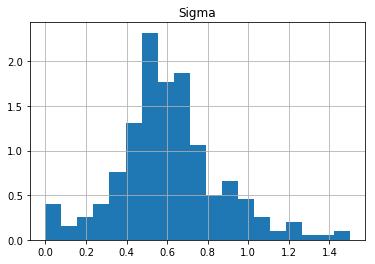

In [13]:
valid_info_frame["Sigma"] = np.abs(valid_info_frame["Sigma"])
bins = np.linspace(0, 1.5, 20)
valid_info_frame.hist("Sigma",  normed = 1, bins = bins)

Average Sigma 0.61418098208 Std in Sigma 0.268581953859
(253, 6)


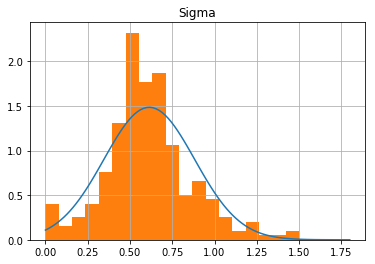

In [14]:
from scipy.stats import norm

mu_fit, sig_fit =  norm.fit(valid_info_frame["Sigma"].values)
print "Average Sigma", mu_fit, "Std in Sigma", sig_fit
#x, xmax = plt.xlim()
fig = plt.figure()
ax = fig.add_subplot("111")
x = np.linspace(0, 1.8, 100)
p = norm.pdf(x, mu_fit, sig_fit)
plt.plot(x, p)
valid_info_frame.hist("Sigma", normed = 1, ax = ax, bins = bins)
print valid_info_frame.shape

In [24]:
print valid_info_frame.shape
#print valid_info_frame.head(2)
print parameters.shape
start = time.time()
summary = np.zeros((valid_info_frame.shape[0],3)) # ID score, p values, A mu sigma
counter = -1
for index_val in range(0,int(parameters.shape[0])):
    index_val =265
    print index_val

    
    if parameters["ID"][index_val] in valid_info_frame["ID"].values:
        counter +=1
        location = np.where(parameters["ID"][index_val] == valid_info_frame["ID"].values)[0][0]
        #print location
        gamma = parameters["Gamma"][index_val]
        alpha = parameters["Alpha"][index_val]
        loc = parameters["Location"][index_val]
        x = np.log10(sub_short["instability_time"].values[index_val])
        #print "Spread", alpha
        #print gamma, alpha, loc, x 
        vals= np.linspace(loc+0.001, loc+alpha*5, 500)
        final_y  = np.zeros(100)
        for i in range(int(vals.shape[0])):
            bins = np.linspace(loc , loc+5*alpha, 100)
            val1 = vals[i]
            #get the entire pdf
            prob = weib_pdf_val(val1, loc, gamma, alpha)
            #get the probability that time being drawn
            y = prob*weib_pdf(bins, val1,gamma, alpha)
            ax.plot(bins, y)#just to prevent any errors
            final_y = np.nansum(np.asarray([y, final_y]), axis = 0)  

        params = valid_info_frame.iloc[location, :]# row with teh correct params
        p0 = [1., loc+alpha*3, alpha] #norm, mean, sigma

        coeff, var_matrix = scipy.optimize.curve_fit(gauss, bins, final_y, p0 = p0)
        # Get the fitted curve
        hist_fit = gauss(bins, *coeff)
        print counter#
        score = scipy.stats.shapiro(final_y)
        print score
        summary[counter, 0] = parameters["ID"][index_val]
        summary[counter,1] = score[0]
        summary[counter, 2] = score[1]

        #print scipy.stats.anderson(final_y)

    #break   
end = time.time()
print end-start


(253, 6)
(266, 4)
265
0
(1.0, 1.0)
99.9251661301


In [28]:
#save the info, so this doesn't need to be rerun
#summary_frame = pd.DataFrame(summary, columns=["ID", "ShapiroScore", "P-value"])
#summary_frame.to_csv("../../../Goodness_0f_Fit_Test.csv")
#summary_frame.head()

In [29]:
summary_frame = pd.read_csv("../../../Goodness_0f_Fit_Test.csv", index_col =0 )
summary_frame.tail()
#dont worry about 99, that didnt have the gaussian fit converge, so that can be ignored.

,ID,ShapiroScore,P-value
248,67.0,0.516483,1.431862e-16
249,7431.0,0.784115,8.285428e-11
250,8462.0,0.802557,2.968922e-10
251,8744.0,0.924164,2.357212e-05
252,91.0,0.856748,2.122787e-08


2


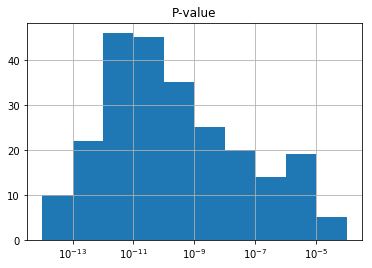

In [37]:
print len(np.where(summary_frame["P-value"] >0.05)[0])
bins = np.logspace(-14, -4, 11)
summary_frame.hist("P-value", bins = bins)
plt.xscale("log")